In [82]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

 - [Linear Regression](http://localhost:8888/notebooks/projects/machine_learning/Untitled1.ipynb?kernel_name=python3#Linear-regression)
 - [Polynomial Regression](http://localhost:8888/notebooks/projects/machine_learning/Untitled1.ipynb?kernel_name=python3#Polynomial-regression)
 - [Ridge Regression](http://localhost:8888/notebooks/projects/machine_learning/Untitled1.ipynb?kernel_name=python3#Ridge-Regression)
 - [Lasso Regression](http://localhost:8888/notebooks/projects/machine_learning/Untitled1.ipynb?kernel_name=python3#Lasso-Regression)
 - [Elastic Net](http://localhost:8888/notebooks/projects/machine_learning/Untitled1.ipynb?kernel_name=python3#Elastic-Net-(L1-(Lasso-Regression)-&-L2-(Ridge-Regression)))
 - [Usage of saved models](http://localhost:8888/notebooks/projects/machine_learning/Untitled1.ipynb?kernel_name=python3#Use-saved-models)

In [83]:
df = pd.read_csv("DATA/Advertising.csv")

In [84]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [85]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [87]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [88]:
X = df.drop('sales', axis=1)
y = df['sales']

In [89]:
y 

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [90]:
# check if there is null/empty values
X.isnull().sort_values(by=['TV'],ascending=False, na_position='first')

,TV,radio,newspaper
0,False,False,False
137,False,False,False
127,False,False,False
128,False,False,False
129,False,False,False
...,...,...,...
69,False,False,False
70,False,False,False
71,False,False,False
72,False,False,False


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


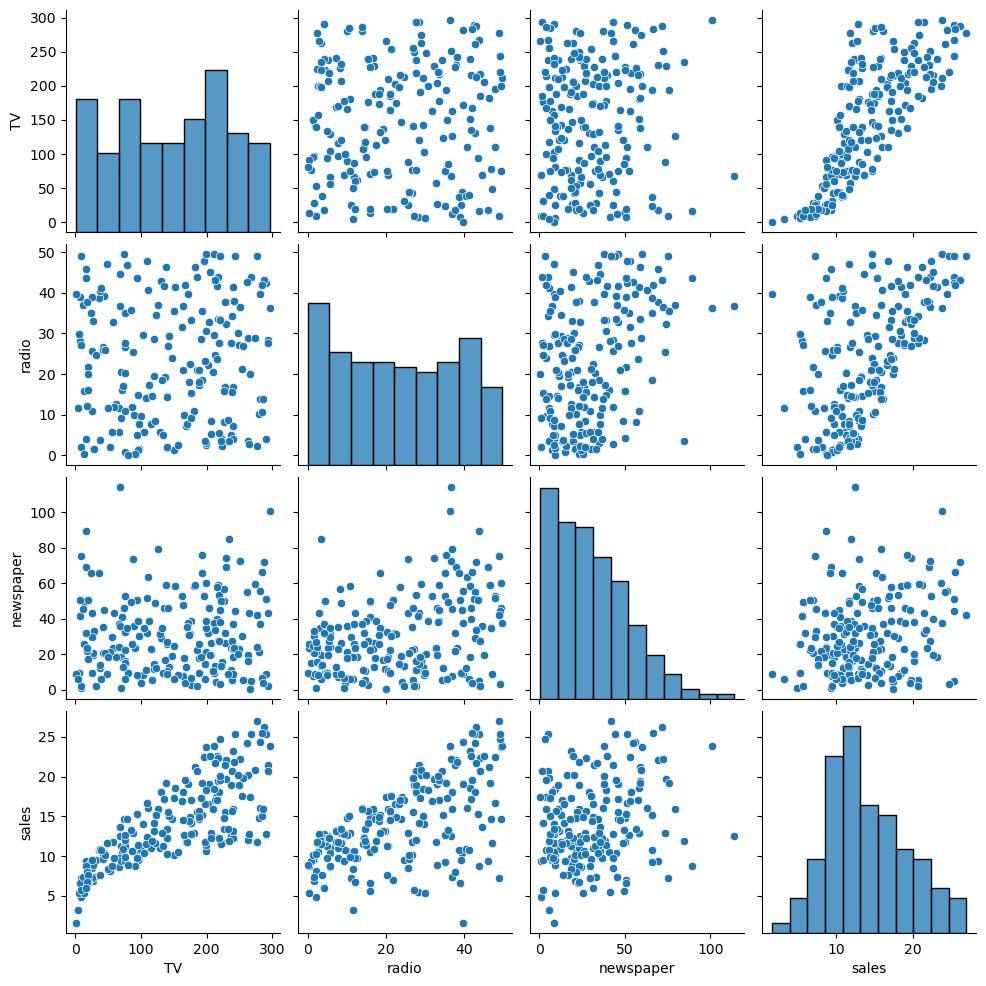

In [91]:
sns.pairplot(df)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Linear regression

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [95]:
test_predictions = model.predict(X_test)

In [96]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [97]:
print('MAE: ', MAE)
print('MSE: ', MSE)
print('RMSE: ', RMSE)

MAE:  1.2137457736144808
MSE:  2.2987166978863782
RMSE:  1.516151937599388


In [98]:
# Can tell if it was a good choice to take linear regression as method of prediction for that data set
test_residuals = y_test - test_predictions

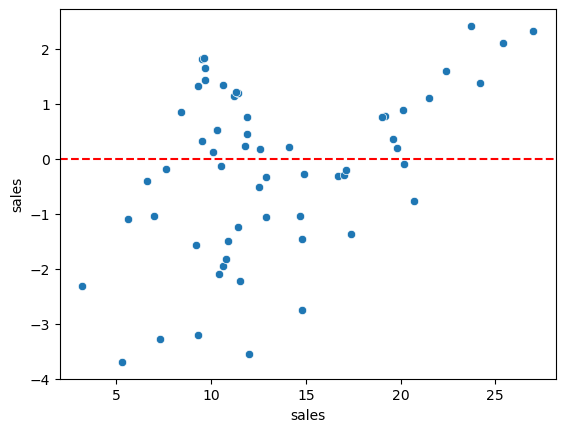

In [99]:
# no clear line or curve says that it can be a good choice for linear regression, 
# it should be more or less random and distributed around zero line
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y = 0, color = 'red', ls = '--')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


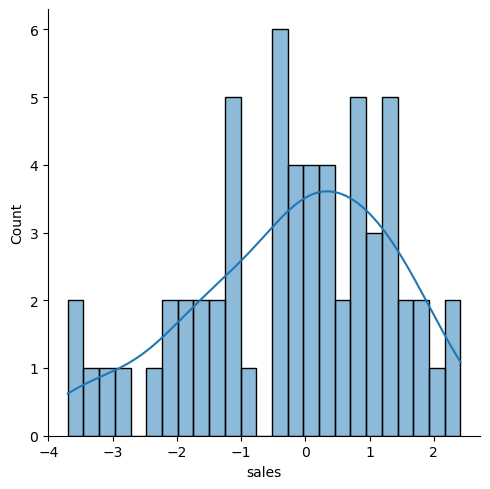

In [100]:
# kde nearly close to zero - that's good 
sns.displot(test_residuals, bins = 25, kde = True)

In [101]:
final_model = LinearRegression()

In [102]:
final_model.fit(X, y)

LinearRegression()

- return 3 elements array: coefficients for TV, radio and newspaper feature
- shows relation between each feature and sales (label) if it's nearly 0 - means
- there are no relation bwtween values
- means if we add +1$ to advertisment to some feature - sales will increase on coefficient value

In [103]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [104]:
y_hat = final_model.predict(X)

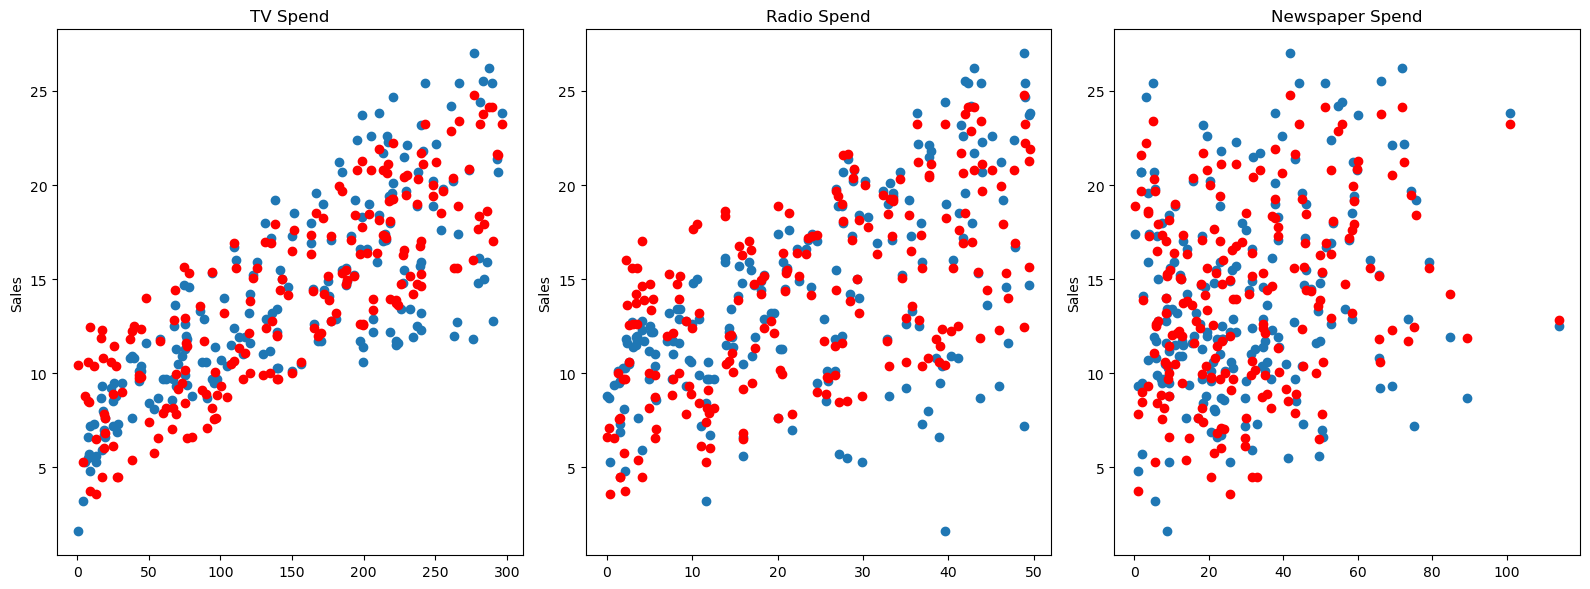

In [105]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],y,'o')
axes[0].plot(df['TV'],y_hat,'o', color = 'red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],y,'o')
axes[1].plot(df['radio'],y_hat,'o', color = 'red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],y,'o')
axes[2].plot(df['newspaper'],y_hat,'o', color = 'red')
axes[2].set_title("Newspaper Spend")
axes[2].set_ylabel("Sales")

plt.tight_layout()

In [106]:
dump(final_model, 'sales_model.joblib') 

['sales_model.joblib']

# Polynomial regression

In [107]:
from sklearn.preprocessing import PolynomialFeatures

In [108]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    polynomial_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [109]:
print('train_rmse_errors: ', train_rmse_errors)
print('test_rmse_errors: ', test_rmse_errors)

train_rmse_errors:  [1.734594124329376, 0.5879574085292232, 0.43393443569020673, 0.35170836883993534, 0.25093429198022715, 0.19185821260128919, 0.1056073775169378, 4.514149224340287e-11, 2.1239340192825284e-11]
test_rmse_errors:  [1.5161519375993884, 0.6646431757268993, 0.5803286825159618, 0.5077742639151743, 2.575819749273429, 7.228640132049439, 113.1458702741498, 1396.8451791852053, 2342.536947336971]


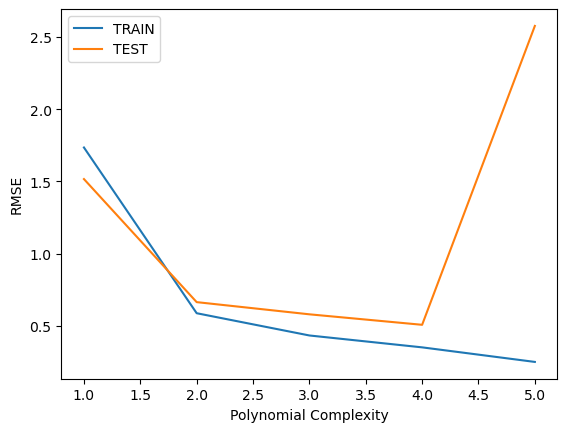

In [110]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

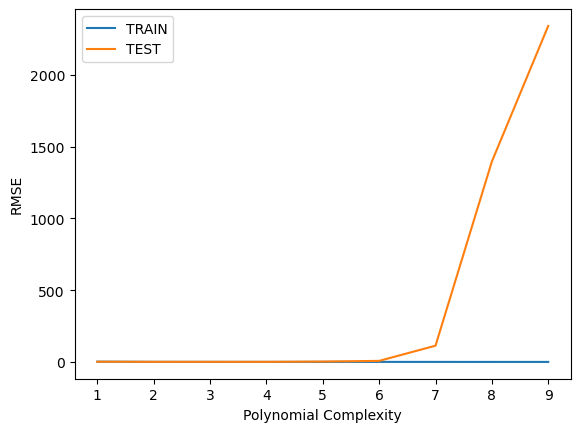

In [111]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

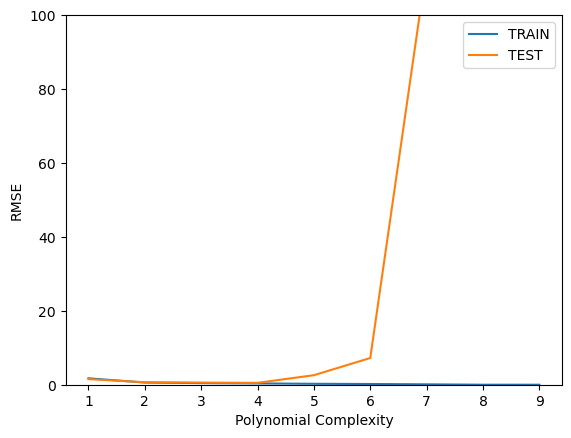

In [112]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()

In [113]:
# Based on our chart, could have also been degree=4, but 
# it is better to be on the safe side of complexity
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)
final_model = LinearRegression()
final_model.fit(final_poly_converter.fit_transform(X),y)
dump(final_model, 'polynomial_regression.joblib') 
dump(final_poly_converter,'polynomial_converter.joblib')

['polynomial_converter.joblib']

# Ridge Regression

In [115]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [116]:
# alpha is a penalty param if model is making a mistake during the learning
# in the meanwhile we chose it randomly, later it can be chosen with cross validation method
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)
test_predictions = ridge_model.predict(X_test)

MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

print('MAE: ', MAE)
print('MSE: ', MSE)
print('RMSE: ', RMSE)

MAE:  0.624991563578321
MSE:  0.8567519843015013
RMSE:  0.9256089802403071


In [117]:
# runs cross validation for the variety of the parameters
# Not all scoring can be working with the regression tasks, some for the classification etc
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

# The more alpha options is passed, the longer this will take.
# Fortunately data set is still pretty small
ridge_cv_model.fit(X_train,y_train)

# Returns which alpha performed the best:
print('alpha: ', ridge_cv_model.alpha_)

test_predictions = ridge_cv_model.predict(X_test)

MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

print('MAE: ', MAE)
print('MSE: ', MSE)
print('RMSE: ', RMSE)

print('coefficients: ', ridge_cv_model.coef_)
print('best score: ', ridge_cv_model.best_score_)

alpha:  1.0
MAE:  0.5953100575021051
MSE:  0.8543040650866316
RMSE:  0.9242857053350071
coefficients:  [ 3.24417964e+00  7.81879078e-01  1.58464053e-01 -5.68885604e-01
  2.43388762e+00  2.73918332e-01 -3.50221690e-01  3.29459798e-01
 -1.98987907e-01 -8.12622390e-01  9.64428148e-02 -4.99385074e-01
  1.34998229e+00  2.24908940e-01 -1.47548474e-03 -5.65396163e-01
  9.18740228e-02 -1.05326902e-01  1.47965270e-02 -4.63297286e-01
 -7.55448380e-02 -2.88164957e-01 -1.75702068e-01 -2.03681122e-01
 -1.44358267e-01  8.44291267e-01  5.49883507e-02 -7.07981008e-02
  7.52868185e-03 -4.64299449e-01  6.74526515e-02 -1.01328688e-01
 -1.78625428e-02  1.33560100e-01 -1.41250018e-01  7.10640261e-02
 -2.28200492e-02 -1.75551171e-01 -6.26382150e-02  5.61460304e-03
 -2.88558217e-01 -1.82683441e-01 -9.17746432e-02 -1.51904659e-02
  5.79875088e-01  1.27741212e-02 -9.29480606e-02 -4.02004267e-02
 -2.69218483e-03 -2.82847940e-01  8.39699315e-02 -4.16070203e-02
 -1.69699268e-02  7.68381871e-02  1.30169558e-01  5.

In [137]:
# Based on our chart, could have also been degree=4, but 
# it is better to be on the safe side of complexity
final_model = Ridge(alpha=ridge_cv_model.alpha_)
final_model.fit(X, y)
dump(final_model, 'ridge_regression.joblib') 

['ridge_regression.joblib']

# Lasso Regression

In [122]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [120]:
# perfoming cross validation to get the best alpha param
# with the change of eps it can be consider more features during model trail - with better performance MAE RMSE
# the model will become more complex the, but with better results
#  eps = 0.01 returns almost same results as Ridge Regression with the only usage of half features
lasso_cv_model = LassoCV(eps = 0.1,n_alphas = 100,cv = 5, max_iter = 1000000)
lasso_cv_model.fit(X_train,y_train)
# Returns which alpha performed the best:
print('alpha: ', lasso_cv_model.alpha_)

test_predictions = lasso_cv_model.predict(X_test)

MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

print('MAE: ', MAE)
print('MSE: ', MSE)
print('RMSE: ', RMSE)

print('coefficients: ', lasso_cv_model.coef_)

alpha:  0.4943070909225828
MAE:  0.6541723168495853
MSE:  1.2787088566807507
RMSE:  1.1308000958086053
coefficients:  [ 1.00265103  0.          0.          0.          3.79745277  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         

In [123]:
# Based on our chart, could have also been degree=4, but 
# it is better to be on the safe side of complexity
final_model = Lasso(alpha=lasso_cv_model.alpha_)
final_model.fit(X, y)
dump(final_model, 'lasso_regression.joblib') 

['lasso_regression.joblib']

# Elastic Net (L1 (Lasso Regression) & L2 (Ridge Regression))

In [126]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [128]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)
elastic_model.fit(X_train,y_train)
print('ratio: ', elastic_model.l1_ratio_)
test_predictions = elastic_model.predict(X_test)

MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
print('MAE: ', MAE)
print('MSE: ', MSE)
print('RMSE: ', RMSE)

train_predictions = elastic_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
print('MAE: ', MAE)

print('coefficients: ', elastic_model.coef_)

ratio:  1.0
MAE:  0.552611887572977
MSE:  0.6099809834301614
RMSE:  0.7810127933844371
MAE:  0.3654603526375709
coefficients:  [ 3.60306653e+00  1.36580332e+00  3.60088455e-01 -8.60143731e-01
  1.91112526e+00 -4.28080493e-01 -6.31552185e-01  1.55598439e-02
  6.69083287e-03 -8.87317486e-01  7.85319050e-01 -5.48059986e-02
  6.97180589e-01 -9.60271731e-02 -0.00000000e+00 -5.00816813e-01
  3.19037478e-03  0.00000000e+00  0.00000000e+00 -5.55613337e-01
  1.62809723e-01  9.51153590e-02  1.55407435e-01  0.00000000e+00
  0.00000000e+00  4.49897059e-01 -9.78070149e-03 -1.38456878e-02
 -0.00000000e+00 -2.53840663e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.88442006e-01 -5.53023062e-02
  6.33112859e-02 -3.48750912e-02 -0.00000000e+00  2.27770241e-02
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.32125675e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.92765141e-02  0.00000000e+00  0.00000000e+00
  1.98145407e-03  1.86181093

In [127]:
final_model = ElasticNet(l1_ratio=elastic_model.l1_ratio_, tol=0.01)
final_model.fit(X, y)
dump(final_model, 'elastic_net_regression.joblib') 

['elastic_net_regression.joblib']

# Use saved models


In [131]:
data_to_be_predicted = [149, 22, 12]
columns=['TV', 'radio', 'newspaper']
campaign = pd.DataFrame(data = [data_to_be_predicted], columns=columns)

In [147]:
loaded_model = load('sales_model.joblib')
print(loaded_model.coef_)
predicted_linear = loaded_model.predict(campaign)
print(predicted_linear)

[ 0.04576465  0.18853002 -0.00103749]
[13.893032]


array([13.893032])

In [136]:
loaded_poly = load('polynomial_converter.joblib')
loaded_model = load('polynomial_regression.joblib')

campaign_poly = loaded_poly.transform(campaign) # transform accourding to polynomial transformation
print(loaded_model.coef_)
predicted_poly = loaded_model.predict(campaign_poly)
print(predicted_poly)

[ 8.96744296e-02  3.87306507e-02  1.40116785e-02 -4.39852533e-04
  1.38525353e-03 -2.11551525e-04 -5.78622015e-04 -3.39038010e-04
  2.30693236e-04  7.62775843e-07 -1.21636828e-06  7.24494002e-07
  1.79932497e-06 -1.51021227e-06 -1.14841391e-07  3.32749144e-06
  4.93904244e-06  2.67349509e-06 -2.30514930e-06]
[14.64501014]


In [138]:
loaded_model = load('ridge_regression.joblib')
print(loaded_model.coef_)
predicted_ridge = loaded_model.predict(campaign)
print(predicted_ridge)

[ 0.04576464  0.1885251  -0.00103629]
[13.89301597]


In [139]:
loaded_model = load('lasso_regression.joblib')
print(loaded_model.coef_)
predicted_lasso = loaded_model.predict(campaign)
print(predicted_lasso)

[ 0.04570866  0.1857551  -0.        ]
[13.87718025]


In [140]:
loaded_model = load('elastic_net_regression.joblib')
print(loaded_model.coef_)
predicted_elastic = loaded_model.predict(campaign)
print(predicted_elastic)

[0.04566662 0.18346275 0.        ]
[13.8799955]


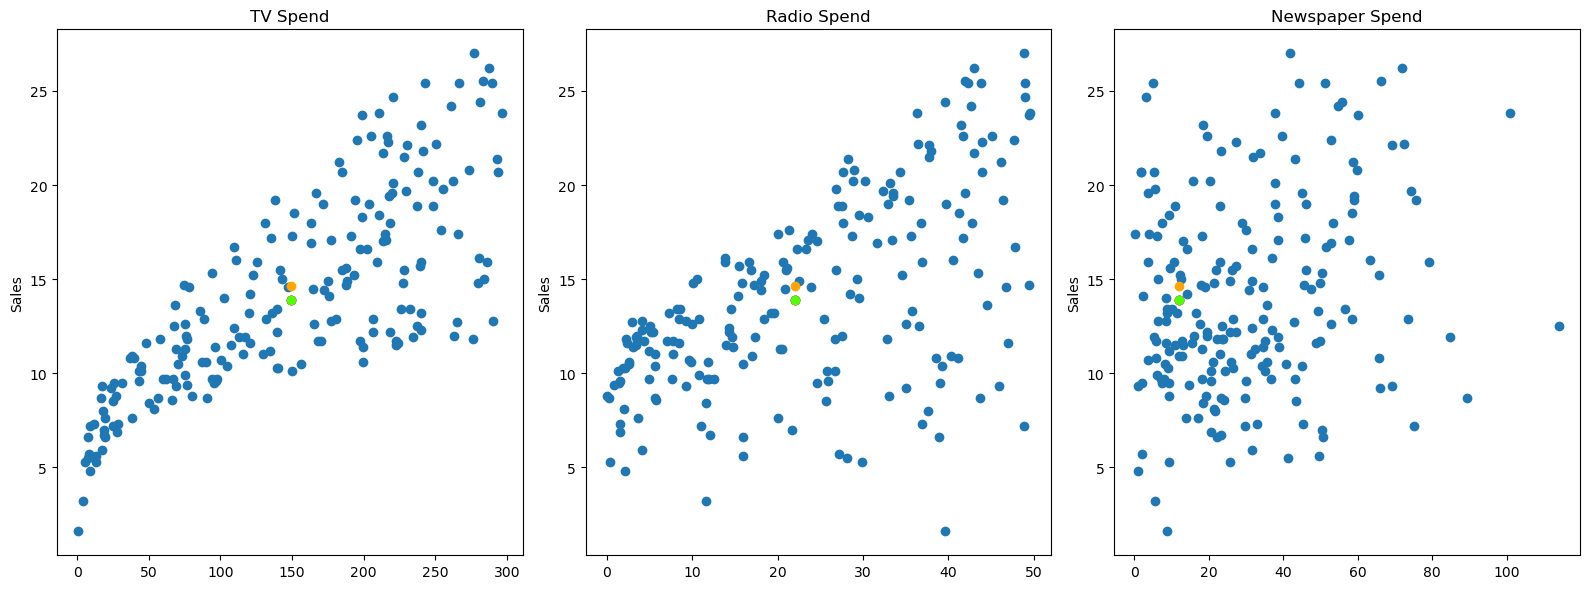

In [178]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],y,'o')
axes[0].plot([data_to_be_predicted[0]], predicted_linear,'o', color = 'red')
axes[0].plot([data_to_be_predicted[0]], predicted_poly,'o', color = 'orange')
axes[0].plot([data_to_be_predicted[0]], predicted_ridge,'o', color = 'pink')
axes[0].plot([data_to_be_predicted[0]], predicted_lasso,'o', color = 'purple')
axes[0].plot([data_to_be_predicted[0]], predicted_elastic,'o', color = '#51FF00') #green
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],y,'o')
axes[1].plot([data_to_be_predicted[1]], predicted_linear,'o', color = 'red')
axes[1].plot([data_to_be_predicted[1]], predicted_poly,'o', color = 'orange')
axes[1].plot([data_to_be_predicted[1]], predicted_ridge,'o', color = 'pink')
axes[1].plot([data_to_be_predicted[1]], predicted_lasso,'o', color = 'purple')
axes[1].plot([data_to_be_predicted[1]], predicted_elastic,'o', color = '#51FF00') #green
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],y,'o')
axes[2].plot([data_to_be_predicted[2]], predicted_linear,'o', color = 'red')
axes[2].plot([data_to_be_predicted[2]], predicted_poly,'o', color = 'orange')
axes[2].plot([data_to_be_predicted[2]], predicted_ridge,'o', color = 'pink')
axes[2].plot([data_to_be_predicted[2]], predicted_lasso,'o', color = 'purple')
axes[2].plot([data_to_be_predicted[2]], predicted_elastic,'o', color = '#51FF00') #green
axes[2].set_title("Newspaper Spend")
axes[2].set_ylabel("Sales")

plt.tight_layout()
